In [120]:
import os
import matplotlib.pyplot as plt
import numpy as np
from models.GAN import GAN
import os
from keras.models import load_model

# it needs for graphviz, but idkw
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# from quickdraw import data, QuickDrawDataGroup로 데이터 받아도 가능. but fogi.

In [20]:
# run params
SECTION = 'gan'
RUN_ID = '0001'
DATA_NAME = 'camel'
RUN_FOLDER = 'C:/Users/MINSUNGKANG/MINSUNGKANGCODE/GAN/run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

### 1. Data Load & preprocessing

In [118]:
# Data Load
dataset = np.load('C:/Users/MINSUNGKANG/MINSUNGKANGCODE/data/full_numpy_bitmap_camel.npy')
x_train = dataset.reshape(121399,28,28,1)

# set fixel value as -1 ~ 1
x_train = (x_train - 127.5) / 127.5

# set fixel value as 0~1
# x_train = x_train/255

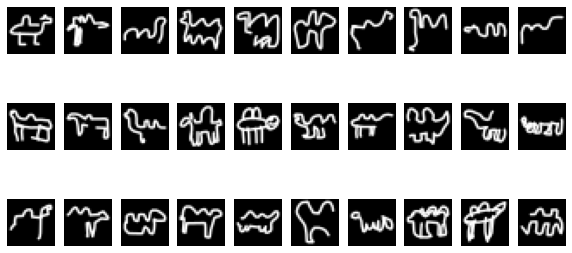

In [35]:
# Display dataset

plt.figure(figsize=(10,5))
for i in range(30):
    rand = np.random.randint(0, len(x_train))
    plt.subplot(3,10,i+1)
    plt.axis('off')
    plt.imshow(x_train[rand,:,:,0], cmap = 'gray')

### 2. Build Model

In [36]:
# build a model for 28*28*1

gan = GAN(input_dim = (28,28,1)
        , discriminator_conv_filters = [64,64,128,128]
        , discriminator_conv_kernel_size = [3,3,3,3]
        , discriminator_conv_strides = [2,2,2,1]
        , discriminator_batch_norm_momentum = 0.8
        , discriminator_activation = 'leaky_relu'
        , discriminator_dropout_rate = 0.4
        , discriminator_learning_rate = 0.0008
        , generator_initial_dense_layer_size = (7, 7, 64)
        , generator_upsample = [2,2, 1, 1]
        , generator_conv_filters = [128,64, 64,1]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [1,1, 1, 1]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = 0.4
        , generator_learning_rate = 0.0004
        , optimiser = 'adam'
        , z_dim = 100
        )

if mode == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [37]:
gan.generator.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 3136)              316736    
_________________________________________________________________
batch_normalization_30 (Batc (None, 3136)              12544     
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 3136)              0         
_________________________________________________________________
reshape_6 (Reshape)          (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 14, 14, 64)        0  

### 3. Train Data

In [39]:
BATCH_SIZE = 64
EPOCHS = 2000
PRINT_EVERY_N_BATCHES = 100

gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
)

### 4. Results

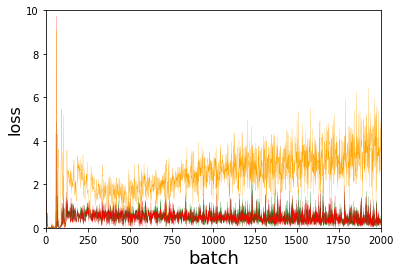

In [43]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[0] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=14)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)
plt.ylim(0, 10)

plt.show()

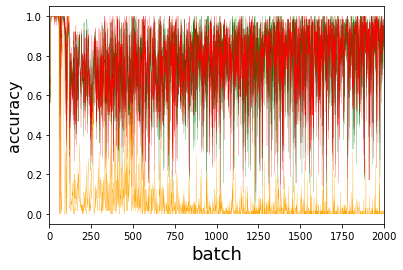

In [42]:
fig = plt.figure()
plt.plot([x[3] for x in gan.d_losses], color='black', linewidth=0.25)
plt.plot([x[4] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[5] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot([x[1] for x in gan.g_losses], color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=14)
plt.ylabel('accuracy', fontsize=16)

plt.xlim(0, 2000)

plt.show()

### 5. Generate Image Usnig GAN

In [62]:
# generator_model makes a new image
# discriminator_model shows how many does a generated image looks like a real image

model = load_model('C:/Users/MINSUNGKANG/MINSUNGKANGCODE/GAN/run/gan/0001_camel/model.h5')
generator_model = load_model('C:/Users/MINSUNGKANG/MINSUNGKANGCODE/GAN/run/gan/0001_camel/generator.h5')
discriminator_model = load_model('C:/Users/MINSUNGKANG/MINSUNGKANGCODE/GAN/run/gan/0001_camel/discriminator.h5')

In [80]:
# select generated image number
image_num = 64
noise = np.random.normal(0, 1, (image_num, 100))

In [97]:
g_result = generator_model.predict(noise)
d_result = discriminator_model.predict(g_result)

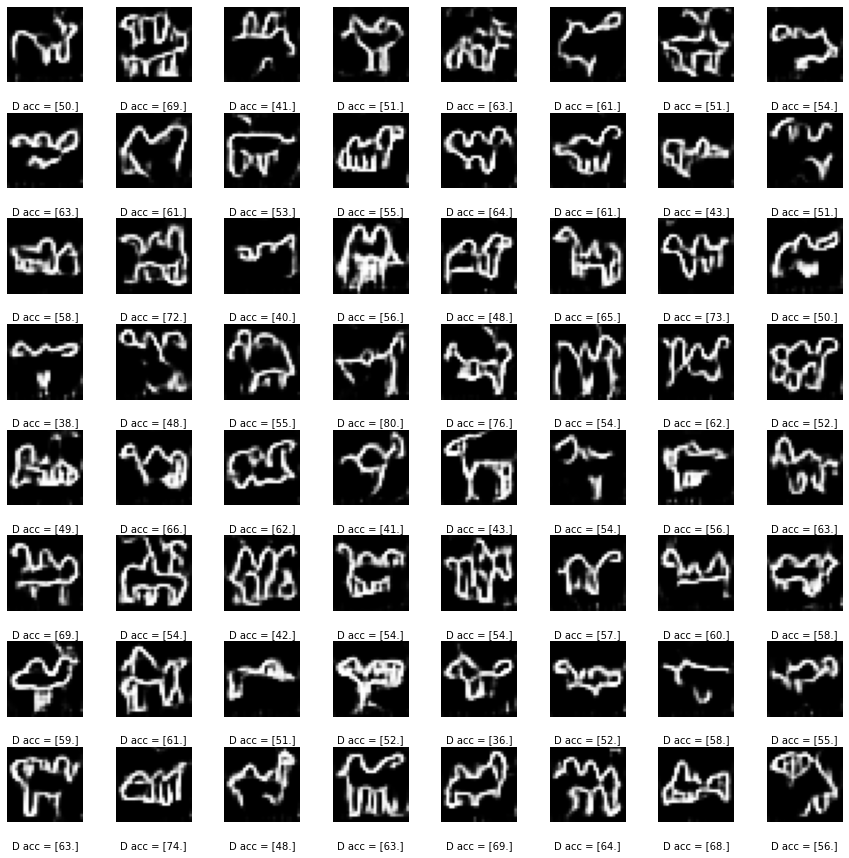

In [117]:
# generated model list and the percentage of reality
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(64):
    ax = plt.subplot(8,8,i+1)
    ax.imshow(result[i,:,:,0], cmap='gray')
    ax.axis('off')
    d_accuracy = str((d_result[i]*100).round())
    ax.text(0.5,-0.35, 'D acc = '+ d_accuracy, fontsize=10, ha='center', transform=ax.transAxes)